In [1]:
# 필요한 모듈 import

import pandas as pd


df = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_대구_202206.csv', encoding = 'cp949')

#df.head(3)

In [2]:
import folium

#위도
latitude = 35.84913602042656
#경도
longitude = 128.58860363697113

m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )
#m

In [3]:
pd.Series(df.columns)

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
dtype: object

In [4]:
sub_df = df.loc[df['법정동명'].isin(['삼덕동','봉덕동','대봉동'])]
#sub_df

In [5]:
sub_df[['위도','경도','상호명']]

,위도,경도,상호명
19,35.846625,128.603750,그린플라워꽃
42,35.842329,128.593976,휴대폰ACC
65,35.844665,128.604631,나윤라이프
74,35.855724,128.606376,인디에프대백프라자점
132,35.860259,128.600675,스마트공인중개사사무소
...,...,...,...
103853,35.855724,128.606376,귀옥메디칼
103888,35.858197,128.605642,브라이트디벨롭먼트
103981,35.862234,128.604078,소반국수
104027,35.834395,128.598178,정진품질시험


In [6]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location = [latitude, longitude],
    zoom_start = 15
)

coords = sub_df[['위도','경도']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="blue")).add_to(marker_cluster)
    
#m

In [7]:
import requests
import json

r = requests.get('https://raw.githubusercontent.com/yousungkim1216/edu/main/jupyter/southkorea.json')
c = r.content

# 좌표 추출
daegu_geo = json.loads(c)

In [8]:
m = folium.Map(
    location = [35.860259, 128.600675], 
    zoom_start = 11,
)

folium.GeoJson(
    daegu_geo, name = '지역구'
).add_to(m)

#m

In [9]:
# Stamen Toner 적용시(옵션 변경을 통해 지도의 테마 변경)
m = folium.Map(location = [35.860259, 128.600675], zoom_start=11, tiles = 'Stamen Toner')

folium.GeoJson(daegu_geo, name='지역구').add_to(m)
#m

In [10]:
# cartodbpositron 적용시(옵션 변경을 통해 지도의 테마 변경)

m = folium.Map(location = [35.860259, 128.600675], zoom_start = 11, tiles = 'cartodbpositron')

folium.GeoJson(daegu_geo, name = '지역구').add_to(m)
#m

In [11]:
daegu = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_대구_202206.csv', encoding = 'cp949')

# 필요한 컬럼 정보가 가져오기
daegu = daegu[['시군구명','상권업종대분류명','상권업종중분류명','위도','경도']]
daegu

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
0,서구,음식,유흥주점,35.884908,128.558109
1,달서구,소매,사무/문구/컴퓨터,35.858010,128.558718
2,동구,음식,한식,35.887930,128.649065
3,북구,소매,선물/팬시/기념품,35.904571,128.619633
4,북구,음식,한식,35.885235,128.589799
...,...,...,...,...,...
104060,북구,관광/여가/오락,스포츠/운동,35.942275,128.564364
104061,달서구,생활서비스,이/미용/건강,35.852792,128.554695
104062,북구,음식,한식,35.928692,128.544808
104063,달서구,생활서비스,이/미용/건강,35.812920,128.546119


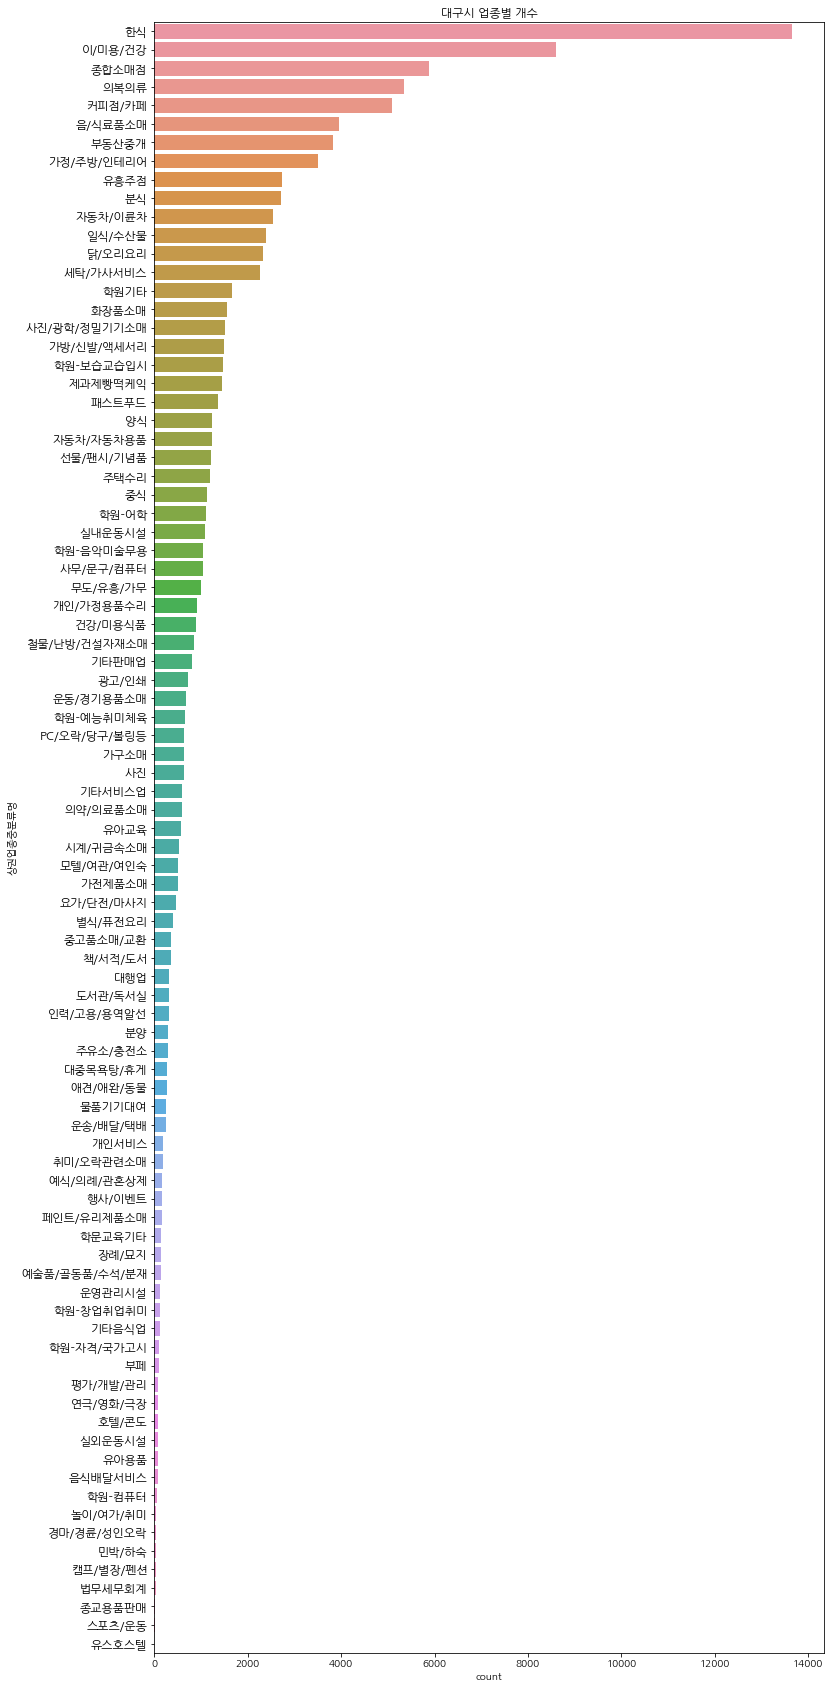

In [12]:
# 대구시 자치구별 상권정보 시각화

import matplotlib.pyplot as plt
import seaborn as sns

#한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12,30))
sns.countplot(y=daegu['상권업종중분류명'],
             order = daegu['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize = 12)
plt.title('대구시 업종별 개수')
plt.show()

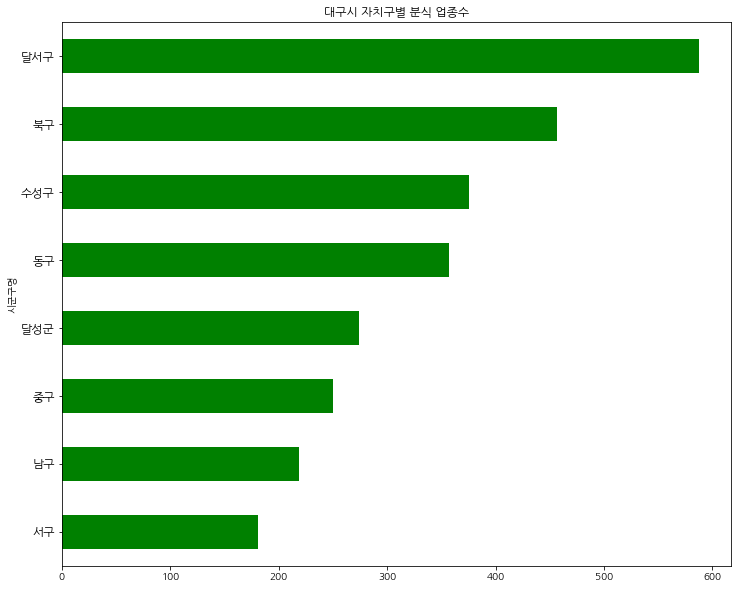

In [13]:
# 분식업종은 자치구별로 어느 곳에 가장 많이 분포해 있는지 시각화

plt.figure(figsize = (12, 10))
daegu.loc[daegu['상권업종중분류명'] ==
         '분식'].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(kind='barh',
            color='green')
plt.yticks(fontsize = 12)
plt.title('대구시 자치구별 분식 업종수')
plt.show()

In [14]:
# folium 위에 시각화

daegu_snackbar = daegu.loc[daegu['상권업종중분류명'] == '분식']
daegu_snackbar

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
131,중구,음식,분식,35.865156,128.605584
196,남구,음식,분식,35.849702,128.571701
215,달서구,음식,분식,35.850867,128.529905
221,수성구,음식,분식,35.839878,128.713308
271,달성군,음식,분식,35.862040,128.458450
...,...,...,...,...,...
103822,수성구,음식,분식,35.839694,128.692241
103837,달서구,음식,분식,35.822882,128.547626
103892,수성구,음식,분식,35.824335,128.628349
103921,달서구,음식,분식,35.843688,128.540972


In [15]:
m = folium.Map(location = [35.860259, 128.600675], zoom_start = 12, tiles = 'cartodbpositron')

folium.GeoJson(daegu_geo, name = '지역구').add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(daegu_snackbar['위도'], daegu_snackbar['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color = 'purple')).add_to(marker_cluster)
    
#m

In [16]:
# 시군구별 분식점 카운팅

daegu_group_data = daegu.loc[daegu['상권업종중분류명'] == '분식'].groupby('시군구명')['상권업종중분류명'].count()

daegu_group_data

시군구명
남구     219
달서구    588
달성군    274
동구     357
북구     457
서구     181
수성구    376
중구     250
Name: 상권업종중분류명, dtype: int64

In [17]:
# 업종별 개수에 따른 색상의 차이

m = folium.Map(location = [35.860259, 128.600675], zoom_start = 12, tiles = 'cartodbpositron')

folium.GeoJson(daegu_geo, name = '지역구').add_to(m)

m.choropleth(geo_data = daegu_geo,
            data = daegu_group_data,
            fill_color = 'PuRd', #PuRd, YlGnBu,
            fill_opacity = 0.5,
            line_opacity = 0.2,
            key_on = 'properties.name',
            legend_name = '지역구별 분식 업종 수')

#m

C:\Users\choiy\AppData\Local\Programs\Python\Python310\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [18]:
bins = list(daegu_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(location = [35.860259, 128.600675], zoom_start = 12, tiles = 'cartodbpositron')

folium.GeoJson(daegu_geo, name = '지역구').add_to(m)

m.choropleth(geo_data = daegu_geo,
            data = daegu_group_data,
            fill_color = 'PuRd', #PuRd, YlGnBu,
            fill_opacity = 0.5,
            line_opacity = 0.2,
            key_on = 'properties.name',
            legend_name = '지역구별 분식 업종 수',
            bins = bins)

#m